# 1. Import and Read the Data
<a id="1"></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [16]:
data = pd.read_csv('loan_data.csv')

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,20,female,High School,226710,0,OWN,2000,VENTURE,8.59,0.01,4,619,Yes,0
1,20,male,Associate,226622,0,MORTGAGE,2000,EDUCATION,8.59,0.01,4,687,Yes,0
2,20,male,Bachelor,226515,0,MORTGAGE,2000,PERSONAL,8.59,0.01,2,598,Yes,0
3,20,female,High School,226402,0,MORTGAGE,2000,VENTURE,8.59,0.01,4,531,Yes,0
4,20,female,High School,162939,0,MORTGAGE,15000,VENTURE,15.96,0.09,2,640,Yes,0


In [17]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 44992 rows and 14 columns.


In [18]:
print(f'The dataset has {data.isna().sum().sum()} null values.')

The dataset has 0 null values.


In [19]:
print(f'The dataset has {data.duplicated().sum()} duplicate values.')

The dataset has 0 duplicate values.


In [20]:
data.dtypes

person_age                          int64
person_gender                      object
person_education                   object
person_income                       int64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                           int64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length          int64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

The columns data type are correct. This is their meaning:

* **person_age.** Age of the person.
* **person_gender.** Gender of the person.
* **person_education.** Highest education level.
* **person_income.** Annual income.
* **person_emp_exp.** Years of employment experience.
* **person_home_ownership.** Home ownership status (e.g., rent, own, mortgage).
* **loan_amnt.** Loan amount requested.
* **loan_intent.** Purpose of the loan.
* **loan_int_rate.** Loan interest rate.
* **loan_percent_income.** Loan amount as a percentage of annual income.
* **cb_person_cred_hist_length.** Length of credit history in years.
* **credit_score.**	Credit score of the person.
* **previous_loan_defaults_on_file.** Indicator of previous loan defaults.
* **loan_status (target variable).** Loan approval status: 1 = approved; 0 = rejected.

In [21]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44992.000000,4.499200e+04,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000
mean,27.746955,7.990956e+04,5.392959,9583.245288,11.006448,0.139735,5.866087,632.582592,0.222262
std,5.901543,6.332239e+04,5.917871,6314.856103,2.979019,0.087207,3.875930,50.398623,0.415771
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577900e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,84.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


# 2. Exploratory Data Analysis
<a id="2"></a>

## 2.1 Overview

<Figure size 1200x600 with 0 Axes>

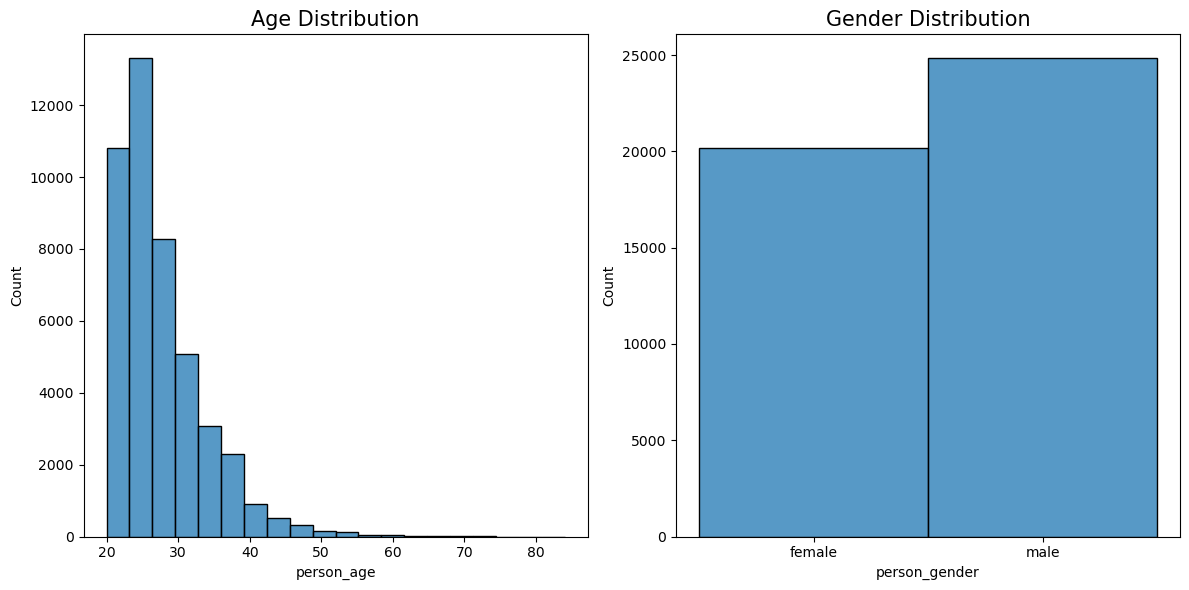

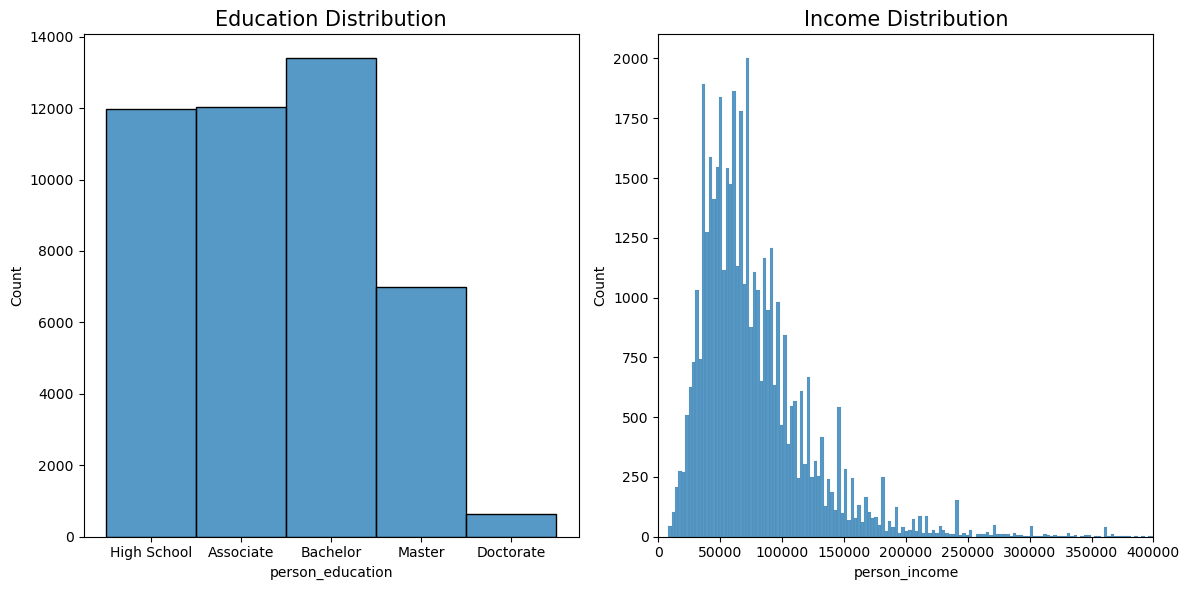

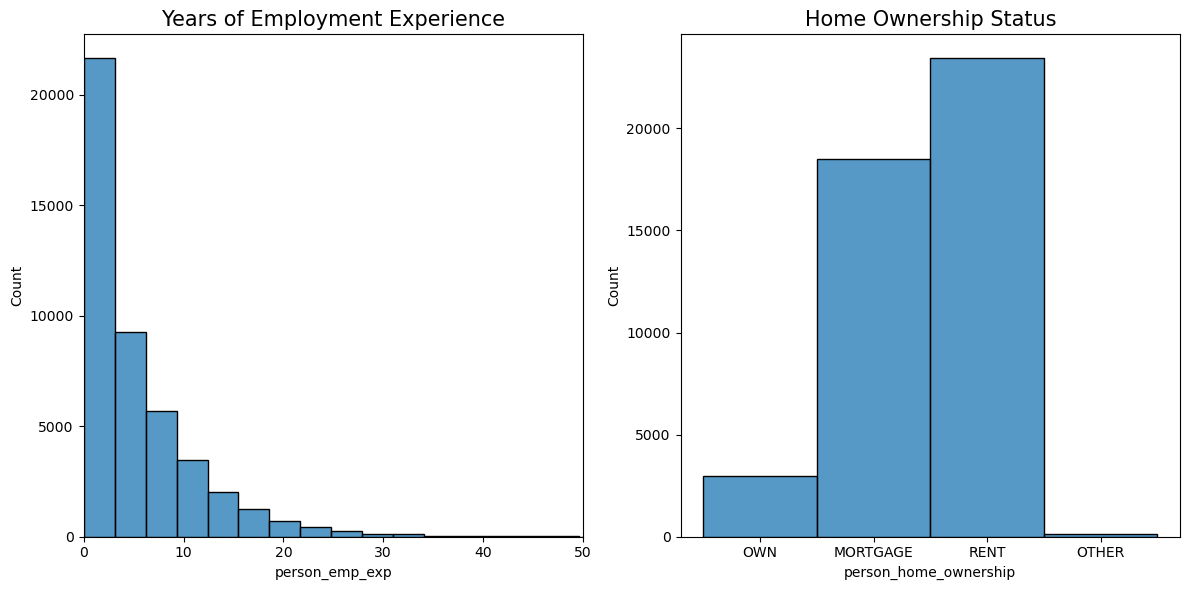

In [22]:
### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, middle, bottom) = bigfig.subfigures(3,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_age', bins=20, ax=ax1)
ax1.set_title('Age Distribution', size=15)

ax2 = sns.histplot(data=data, x='person_gender', ax=ax2)
ax2.set_title('Gender Distribution', size=15)

plt.tight_layout()

### Middle figure ###
middle.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_education', ax=ax1)
ax1.set_title('Education Distribution', size=15)

ax2 = sns.histplot(data=data, x='person_income', ax=ax2)
ax2.set_title('Income Distribution', size=15)
ax2.set_xlim(0, 400000)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_emp_exp', bins=20, ax=ax1)
ax1.set_title('Years of Employment Experience', size=15)
ax1.set_xlim(0, 50)

ax2 = sns.histplot(data=data, x='person_home_ownership', ax=ax2)
ax2.set_title('Home Ownership Status', size=15)

plt.tight_layout()

One can notice that:
* The person age and experience distributions are right skewed.
* There is a slight excess of male clients, even though the gender distribution is quite balanced.
* The majority of clients either pay rent or a mortgage.
* The income distribution is bell-shaped, but right skewed.

C:\Users\aishw\AppData\Local\Temp\ipykernel_9336\3235991938.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, size=8)


<Figure size 1200x600 with 0 Axes>

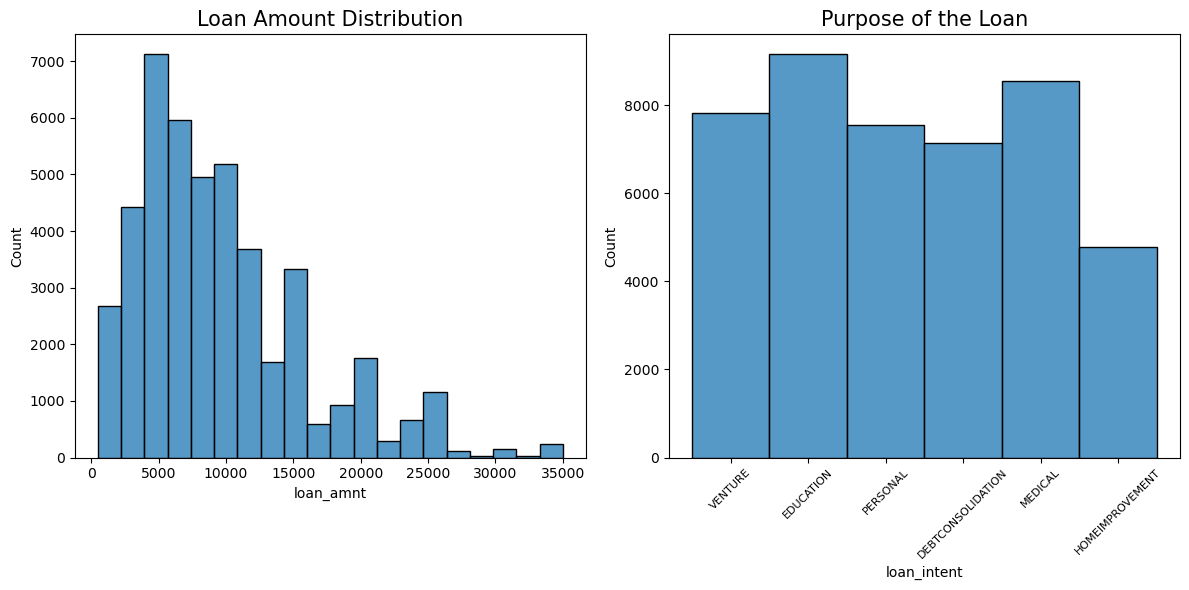

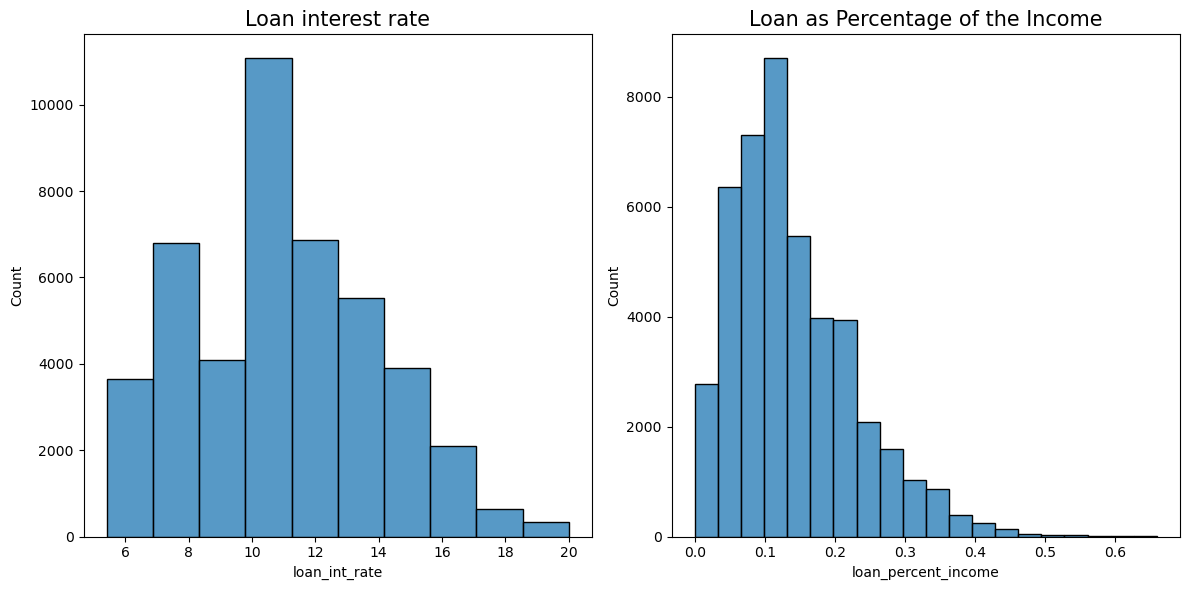

In [23]:
### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_amnt', bins=20, ax=ax1)
ax1.set_title('Loan Amount Distribution', size=15)

ax2 = sns.histplot(data=data, x='loan_intent', ax=ax2)
ax2.set_title('Purpose of the Loan', size=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, size=8)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_int_rate', bins=10, ax=ax1)
ax1.set_title('Loan interest rate', size=15)

ax2 = sns.histplot(data=data, x='loan_percent_income', bins=20, ax=ax2)
ax2.set_title('Loan as Percentage of the Income', size=15)

plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

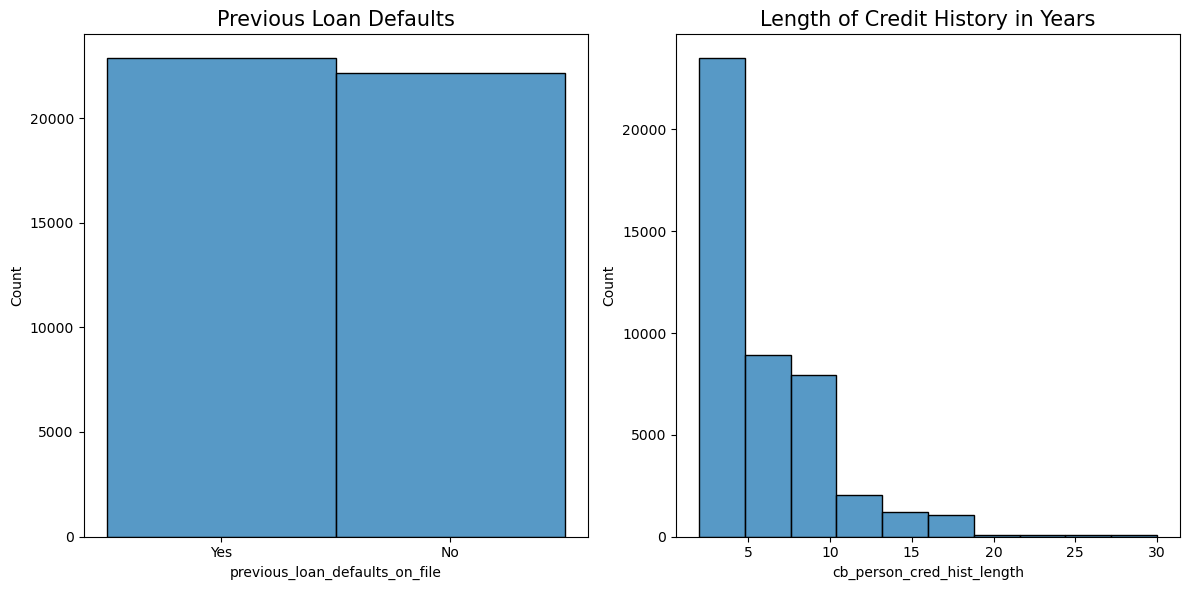

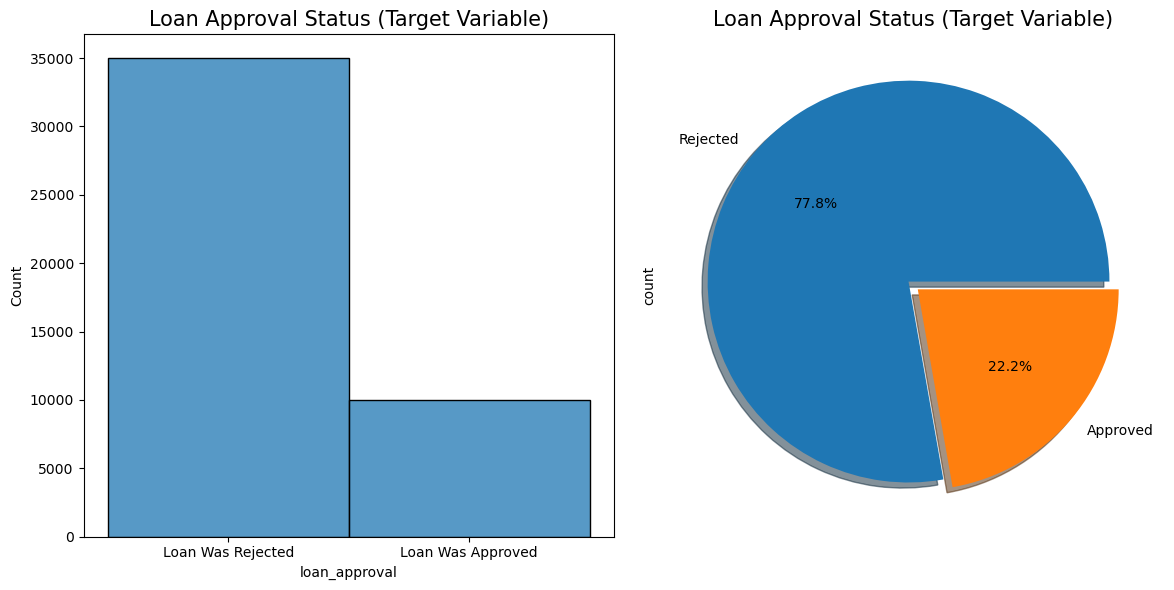

In [24]:
##########################
loan_approval = {0:'Loan Was Rejected', 1:'Loan Was Approved'}
data['loan_approval'] = data['loan_status'].map(loan_approval)

val = data['loan_approval'].value_counts()
##########################

### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='previous_loan_defaults_on_file', ax=ax1)
ax1.set_title('Previous Loan Defaults', size=15)

ax2 = sns.histplot(data=data, x='cb_person_cred_hist_length', bins=10, ax=ax2)
ax2.set_title('Length of Credit History in Years', size=15)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_approval', ax=ax1)
ax1.set_title('Loan Approval Status (Target Variable)', size=15)

val.plot(kind='pie', labels=['Rejected','Approved'], autopct="%1.1f%%", shadow=True, explode=(0.03,0.03))
ax2.set_title('Loan Approval Status (Target Variable)', size=15)

plt.tight_layout()

In [25]:
data.drop('loan_approval', axis=1, inplace=True)

One can notice that:
* Around half of the clients that asked for a loan have a history of loan default.
* The majority of loan requests were rejected. It will be interesting to find what are the main reasons for the loan rejection.

## 2.2 Loan Interest Rate

I am curious to find what are the main factors that determine the large variability in the loan interest rate.

<Figure size 1200x600 with 0 Axes>

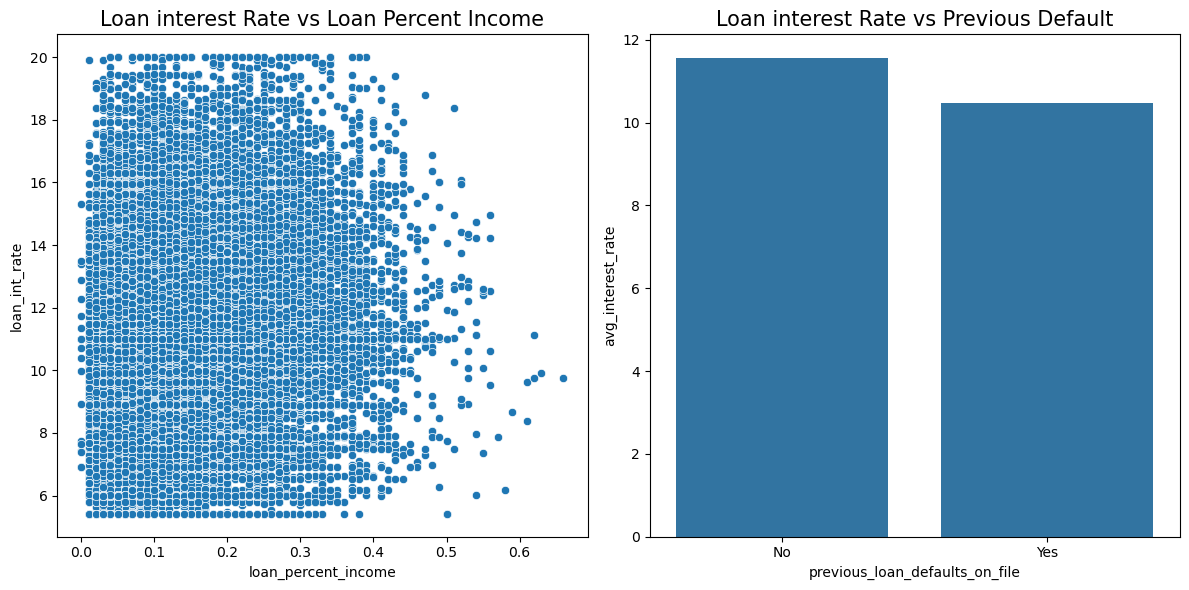

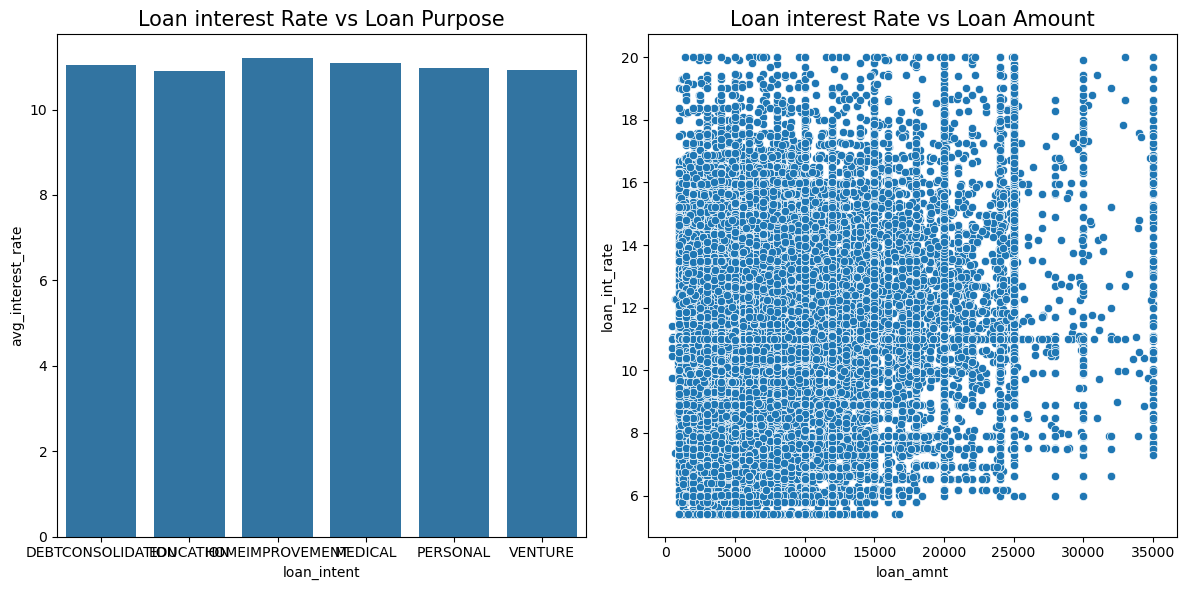

In [26]:
#######################################
int_rate_default = data.groupby('previous_loan_defaults_on_file')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')

int_rate_purpose = data.groupby('loan_intent')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')
#######################################

### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.scatterplot(data=data, x='loan_percent_income', y='loan_int_rate', ax=ax1)
ax1.set_title('Loan interest Rate vs Loan Percent Income', size=15)

ax2 = sns.barplot(data=int_rate_default, x='previous_loan_defaults_on_file', y='avg_interest_rate', ax=ax2)
ax2.set_title('Loan interest Rate vs Previous Default', size=15)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.barplot(data=int_rate_purpose, x='loan_intent', y='avg_interest_rate', ax=ax1)
ax1.set_title('Loan interest Rate vs Loan Purpose', size=15)

ax2 = sns.scatterplot(data=data, x='loan_amnt', y='loan_int_rate', ax=ax2)
ax2.set_title('Loan interest Rate vs Loan Amount', size=15)

plt.tight_layout()

Apparently, there is no relation between the interest rate and other variables, like the person income or the loan purpose.

Let's plot a correlation heatmap to further explore this issue.

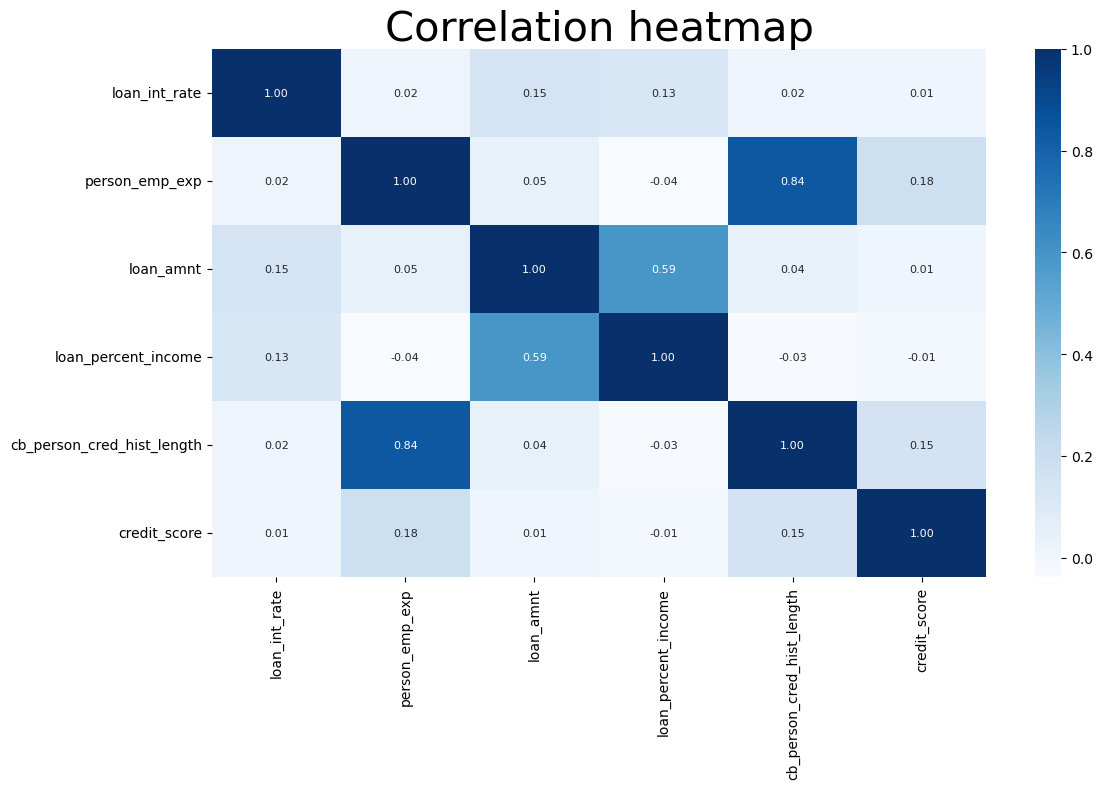

In [27]:
selected_features = ['loan_int_rate', 
                     'person_emp_exp', 
                     'loan_amnt', 
                     'loan_percent_income',
                     'cb_person_cred_hist_length',
                     'credit_score']

plt.figure(figsize=(12,8))
sns.heatmap(data[selected_features].corr(method='pearson'),annot=True,fmt='.2f',annot_kws={"fontsize":8},cmap='Blues')
plt.title('Correlation heatmap',fontsize=30)

plt.tight_layout()
plt.show()

As shown by the heatmap, the loan interest rate has little or no correlation with the other variables.